# **Assignment-4: Static Data Visualization with Seaborn**

**Ali Khalid (ak5013), Muhammad Raees (mr2714), Kaleem Nawaz Khan (kk5271)**, ISTE-782, Spring 2023

# Summary
<div style="text-align: justify">
The dataset being looked at in this study includes statistics on student performance in the fields of math, reading, and writing. Together with the exam results, it also lists the student's ethnicity or race, gender, the level of education of their parents, and if they have access to regular meals and test preparation classes. We can learn a lot from the dataset thanks to the Seaborn visualizations. First of all, we learn that girls do better in reading and writing and that guys perform better in math. In addition, females dominate the overall standings. Furthermore, we discovered that students from ethnicity group E generally outperform other pupils in all academic areas. The parent's educational background has an impact on the students' test results. Students with master's degree-holding parents often perform better than those with bachelor's degree-holding parents. The lowest performers among students are those whose parents just have a high school diploma. The student's ability to have a typical lunch appears to have an impact on how well they do in all three disciplines. Students who get free lunch do worse than those who receive a regular meal, which is higher in both amount and quality. Last but not least, the students who took the test-prep course outperformed their peers. After the discovery of these beneficial insights through the visual display of data, some practical suggestions to raise student performance include the following:

- Standard lunches must be offered to all students.
- All students should be required to sign up for the test preparation course. If a student's financial situation prevents them from enrolling, they should be given a need-based scholarship.
- For male students, an additional reading and writing class should be scheduled.
- Those who are female need to take an additional math class.
- The divide caused by ethnicity should be as little as possible, and student contact should be promoted so that students may learn from one another.
- The students should be encouraged to go for higher education so that the next generation of students mostly have parents with master's degrees.
    
</div>

# **Table of Contents** <a class="anchor" id="0.1"></a>

- [Introduction](#introduction)
- [Data Set](#dataset)
- [Data Visualizations](#data_visualizations)
    - [a. Distribution of Categorical Features](#a)
    - [b. Distribution of Numerical Features](#b)
    - [c. Distribution of Scores w.r.t Categorical Feature](#c)
    - [d. Ethnicity VS Lunch and Test Preparation Course  ](#d)
    - [e. Relation Between Individual Subjects to Overall Score](#e)
    - [f. Corelation between Numerical Feaures of Data](#f)
    - [g. Pair Plots of Numerical Features](#g)
- [References](#references)

# Introduction <a class="anchor" id="introduction"></a>

In this report we are going to perform exploratory data analysis of a [dataset](http://roycekimmons.com/tools/generated_data/exams) that contains the information about the score of students in different subjects like math, reading, and writing. This dataset also contains the information about the parents's education, ethnicity/race, gender, lunch, and test preparation of student. We will try to find the varriables that effect the performance of student overall and also in each individual subject. For this purpoe we will use different plots availble in [Seaborn](https://seaborn.pydata.org/) package to visually explore the relationship between different features.

# Data Set <a class="anchor" id="dataset"></a>

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

sns.set_theme()

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head(10)

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
5                    none          71             83             78  
6               completed          88             95             92  
7                    none          40             43             39  
8               completed          64             64             67  
9                    none          38             60             50

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

# Data Visualizations <a class="anchor" id="data_visualizations"></a>

In [5]:
df['overall'] = (df['math score'] + df['reading score'] + df['writing score'])/3
categorical_features = list(df.select_dtypes(include=['object']).columns)
numerical_features = list(df.select_dtypes(include=['int64']).columns)

According to [Tufte (2001)](https://drive.google.com/file/d/1qzflKQ55teCIuGhCzEf2D55JRN9cOwBI/view?usp=sharing) the plots and analysis based on these plots are only as good as the data itself. Therefore in the next two sections we will explore the distribution of categorical and numerical features so that our conclusions are well informed and incorporate and unbalance in the dataset

## A. Distribution of Categorical Features <a class="anchor" id="a"></a>

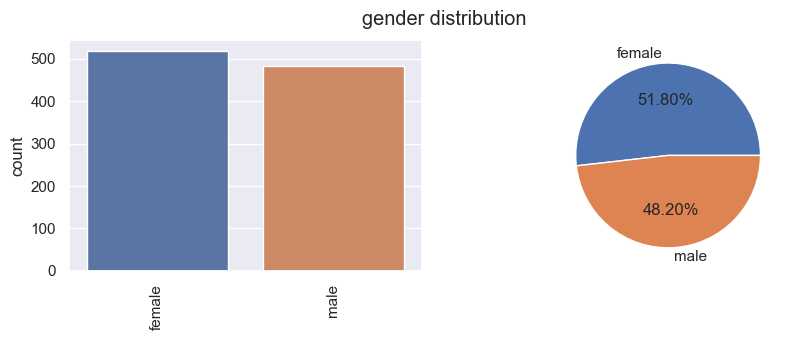

female    518
male      482
Name: gender, dtype: int64


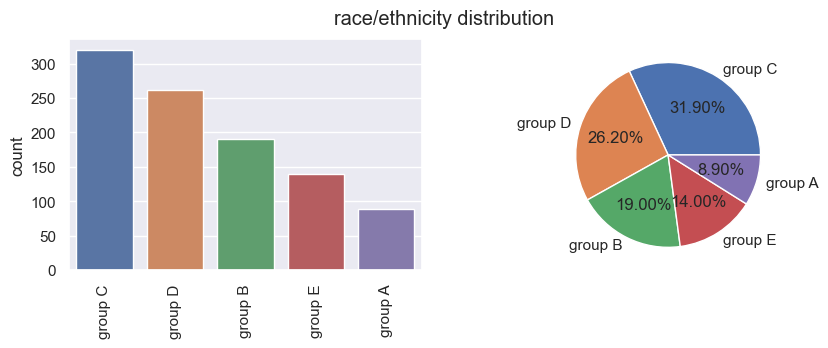

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64


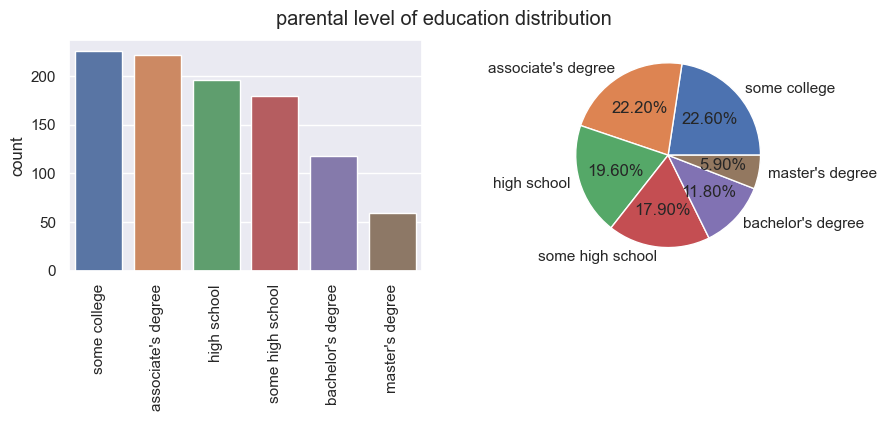

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


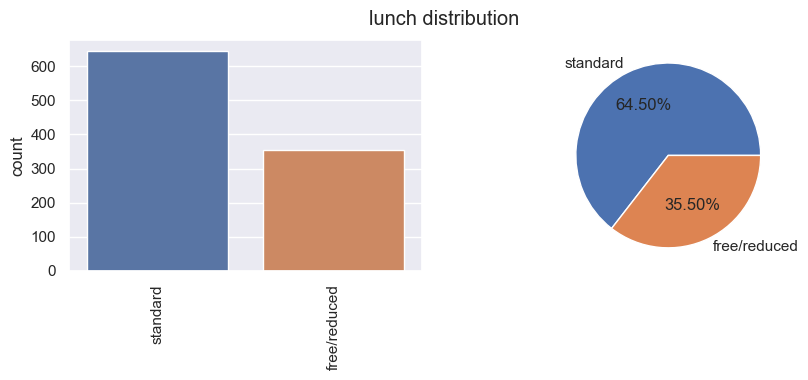

standard        645
free/reduced    355
Name: lunch, dtype: int64


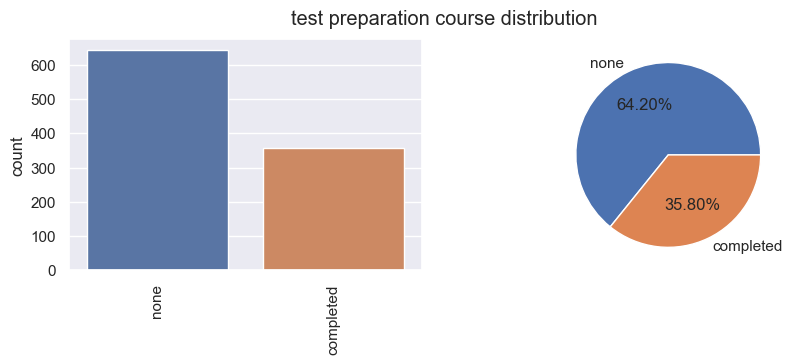

none         642
completed    358
Name: test preparation course, dtype: int64


In [6]:
for feature in categorical_features:
    f = df[feature]
    counts = f.value_counts()
    plt.figure(figsize = (10,3))
    plt.suptitle(feature + ' distribution')
    plt.subplot(121)
    sns.barplot( x=counts.index, y = counts.values )
    plt.ylabel("count")
    plt.xticks(rotation = 90)
    plt.subplot(122)
    plt.pie(counts.values, labels=counts.index, autopct='%1.2f%%')
    plt.show()   
    print(counts)

In this section we exploared the distribution of catergorical features in the data and the summary of the results is as follows:
- The gender ration is almost same. 
- Group C is a dominant race/ethnicity
- Only few students have parents with master's degree
- Most of the students have standard lunch
- Majority of the students have taken a test preparation course

## B. Distribution of Numerical Features <a class="anchor" id="b"></a>

min: 0, max = 100, avg = 66.089


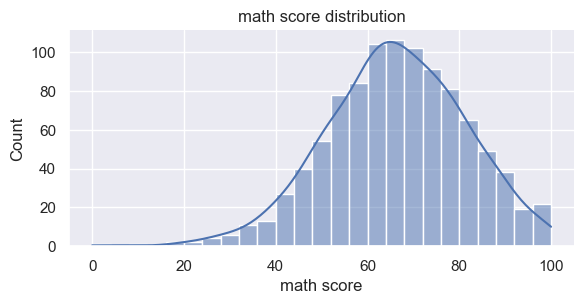

min: 17, max = 100, avg = 69.169


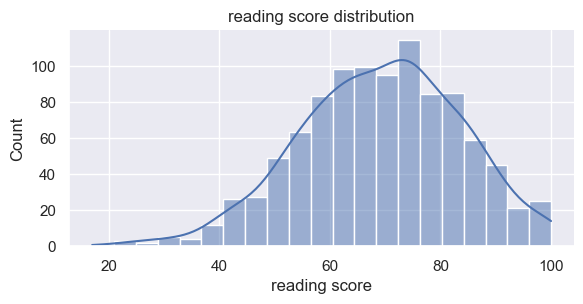

min: 10, max = 100, avg = 68.054


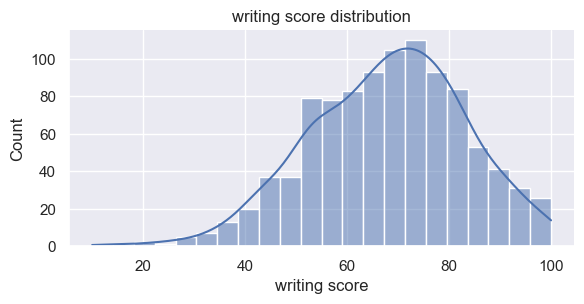

In [7]:
for feature in numerical_features:
    f = df[feature]
    print('min: {}, max = {}, avg = {}'.format(f.min(),f.max(),f.mean()) )
    #plt.figure(figsize = (100,3))
    sns.displot(data=f, kde=True, aspect=2,height = 3)
    plt.title(feature + ' distribution')
    plt.show()   

In this section we visualized the distribution of test scores of different subjects and some of the insights are as follows
- Average score is almost same in all the subjects
- Math is the only subject where minimum score is 0

---

[Bertin (2011)](https://drive.google.com/file/d/1Tl3YdKsG73eAiIJxMdNbtcGGv8n1izZy/view?usp=sharing) said that the first step of making a data visualization is to identify the componets and invariants. The invariant in this data set is that all student took the same exam and all the other features are components. In the section below we have viusalized the data of each subject by grouping them according to different categorical features. Moreover, [Tufte (2001)](https://drive.google.com/file/d/1qzflKQ55teCIuGhCzEf2D55JRN9cOwBI/view?usp=sharing) suggests that the information content of the graphic should be high. Therefore, we have created a subplot for each grouping. The first plot is a modified version of box plot and it also gives information about the quartile ranges. The second plot is a swarm plot and it shows the distribution of data points. 

## C. Distribution of Scores w.r.t Categorical Feature <a class="anchor" id="c"></a>

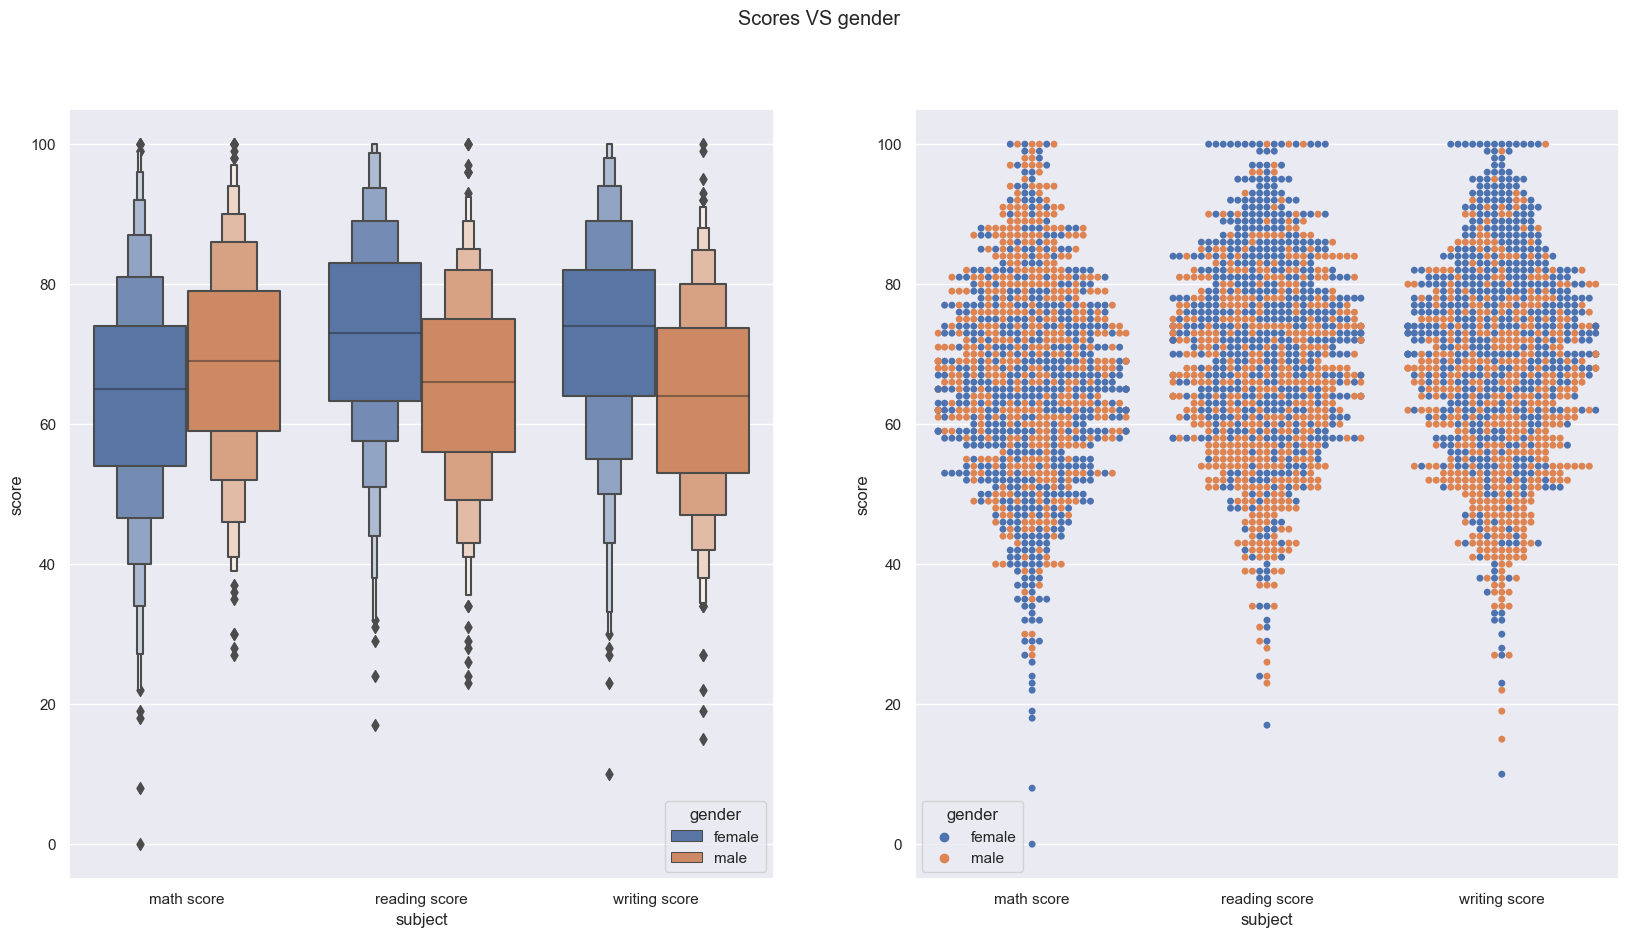

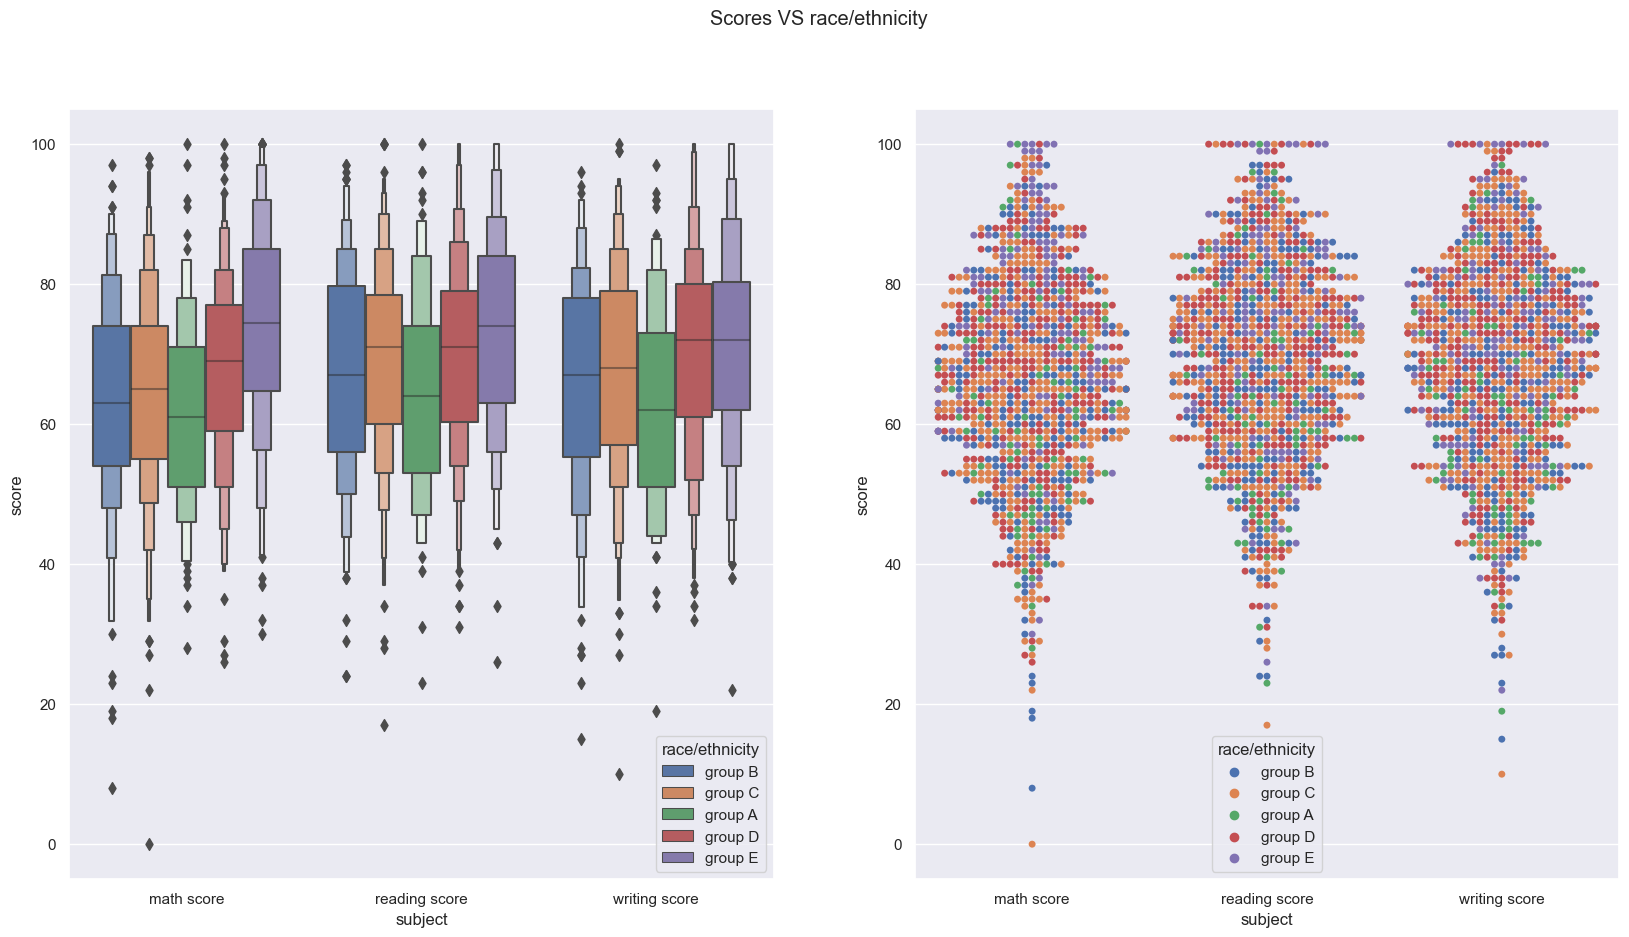

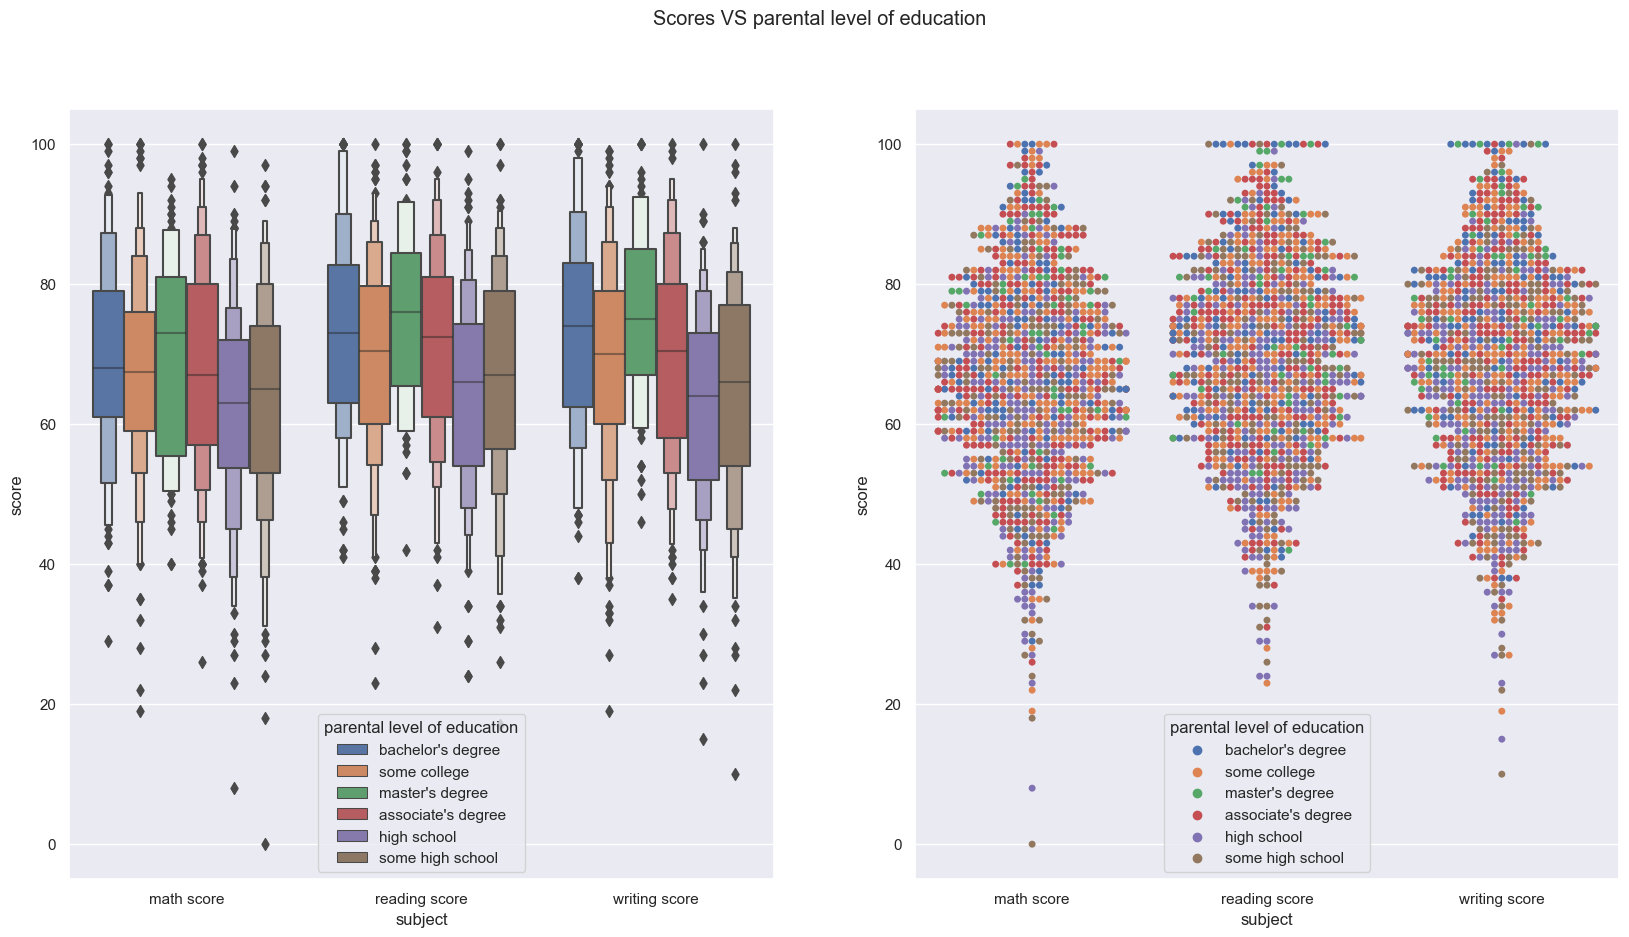

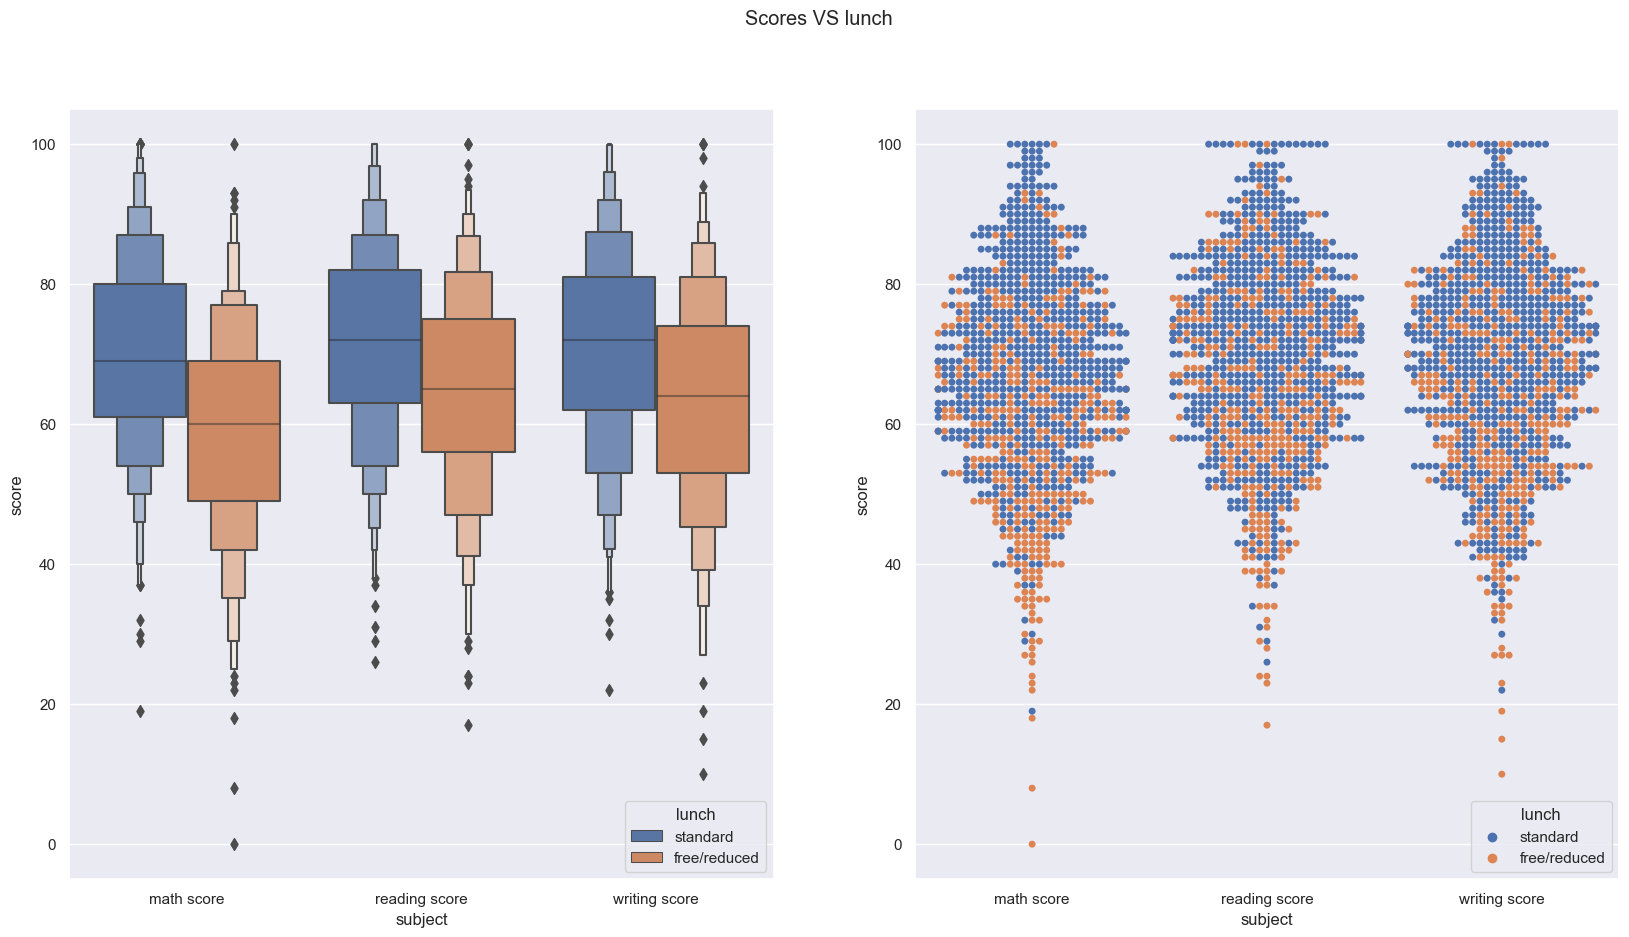

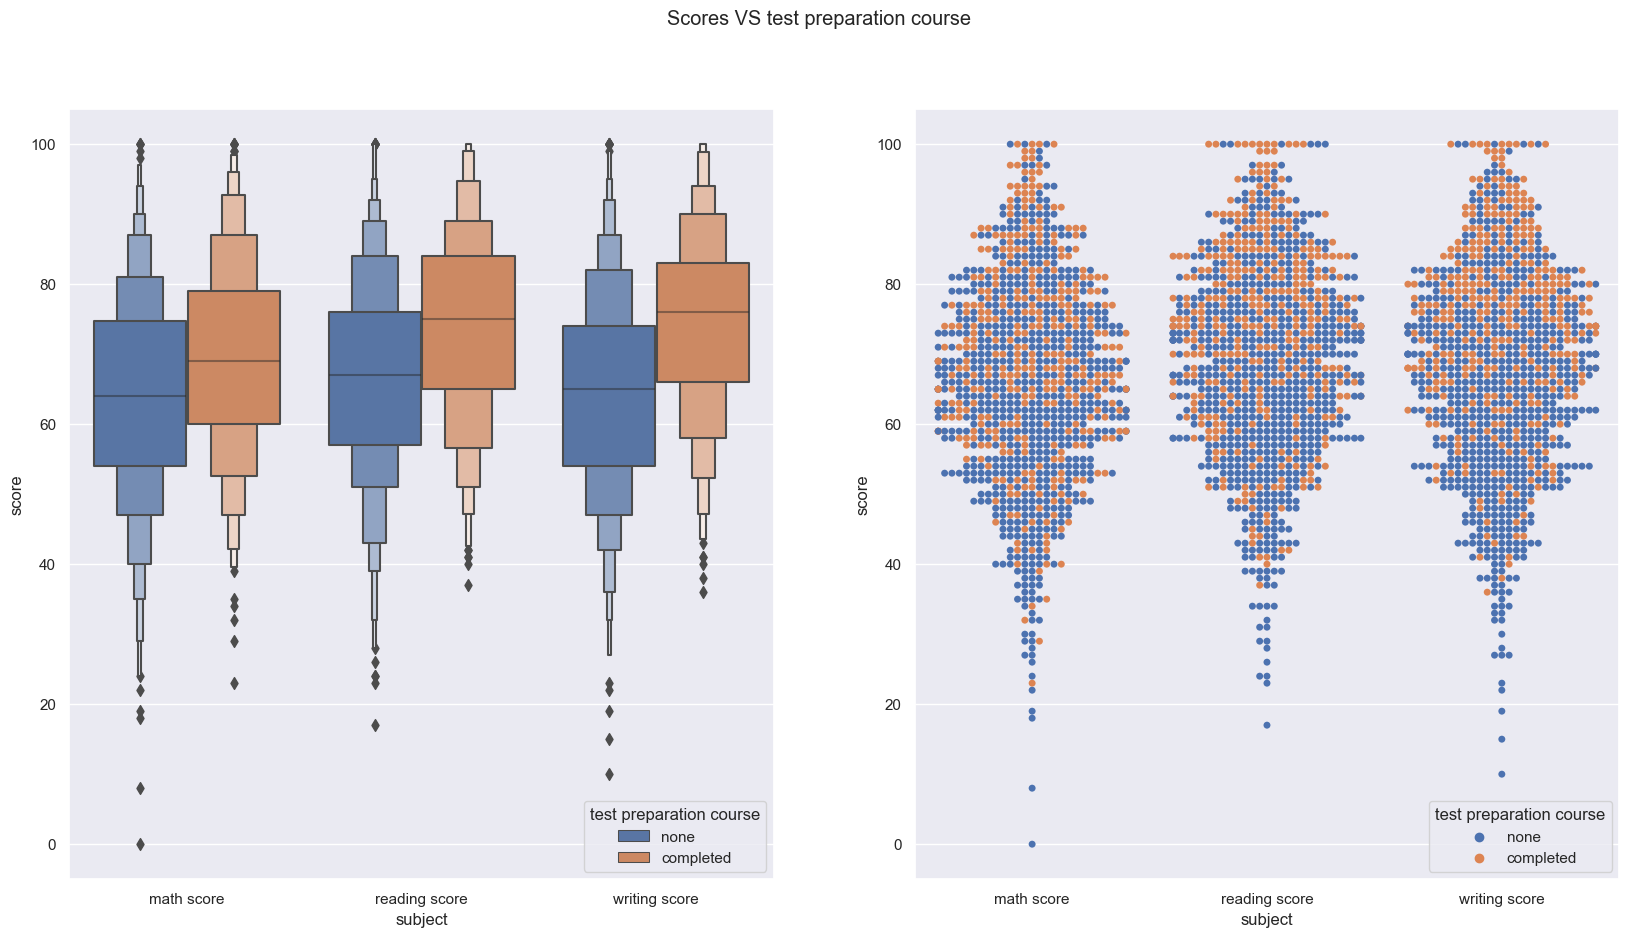

In [8]:
for feature in categorical_features:
    df_subset= df[['math score', 'reading score', 'writing score', feature]].melt(id_vars=[feature], var_name="subject", value_name="score")
    plt.figure(figsize = (20,10))
    plt.suptitle('Scores VS ' + feature)
    plt.subplot(121)
    sns.boxenplot(data = df_subset, x = 'subject', y= 'score', hue= feature)
    plt.subplot(122)
    sns.swarmplot(data = df_subset, x = 'subject', y= 'score', hue= feature)
    plt.show()

Some of the insights drawn from these visualizations are as follows
- Females perform better at reading and writting while males perfoerm better in math.
- Group B ehtniity students has the lowest average in all subjects while Group E students have the highest avergae in all subjects
- Students whoes parents have a master's degree perform better than other students in all subjects. 
- The performance of the students having free/reduced lunch is severly degraded as compared to those having standard lunch. 
- Students who have taken test preparation course performs better than the others. 

---

The plots above made us explore the relation between *lunch* and *test preparation course* with the *ehnicity* because it might be the case that a particular group in ethnicity have low resources which lead the students to having reduced lunch and not registering in test preparation course, that ultimately effect the performance of student. 

## D. Ethnicity VS Lunch and Test Preparation Course <a class="anchor" id="d"></a>

<AxesSubplot: xlabel='count', ylabel='lunch'>

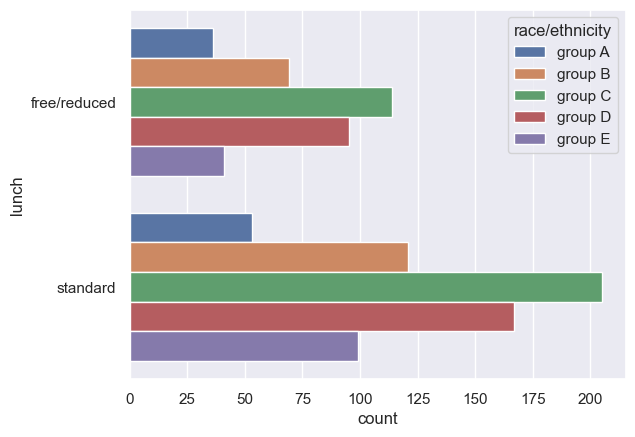

In [9]:
sns.barplot(x='count',
            y='lunch',
            hue='race/ethnicity',
            data=df.groupby(['lunch', 'race/ethnicity']).size().to_frame('count').reset_index())

<AxesSubplot: xlabel='count', ylabel='test preparation course'>

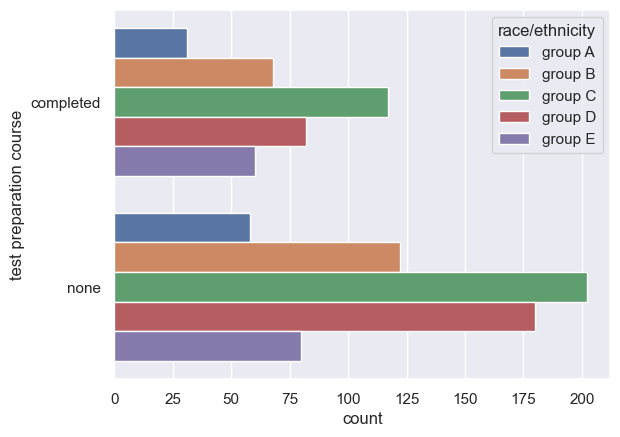

In [10]:
sns.barplot(x='count',
            y='test preparation course',
            hue='race/ethnicity',
            data=df.groupby(['test preparation course', 'race/ethnicity']).size().to_frame('count').reset_index())

The plots above show that our assumption was wrong as the distribution of ethnicity groups with respect to lunch and test preparation course is almost similar. 

---

[Peter Pirolli and Stuart Card (2005)](https://drive.google.com/file/d/1o1WsfNB7PjBHDGsVzI5sN8KlyyZLoKvQ/view?usp=sharing) considered the limited attention span of humans as a leverage point where technology can help humans to overcome this limitation. In the sections below we have viusalized the joint distribution of different feaures and corelation between them. Apart from joint distribution we have plotted the univariate distributions also so that the user dont have to rember it and can focus on infering insights from the viusalizations. In addition to that, following [Tufte (2001)](https://drive.google.com/file/d/1qzflKQ55teCIuGhCzEf2D55JRN9cOwBI/view?usp=sharing) we have showed the data where possible. 

## E. Relation Between Individual Subjects to Overall Score<a class="anchor" id="e"></a>

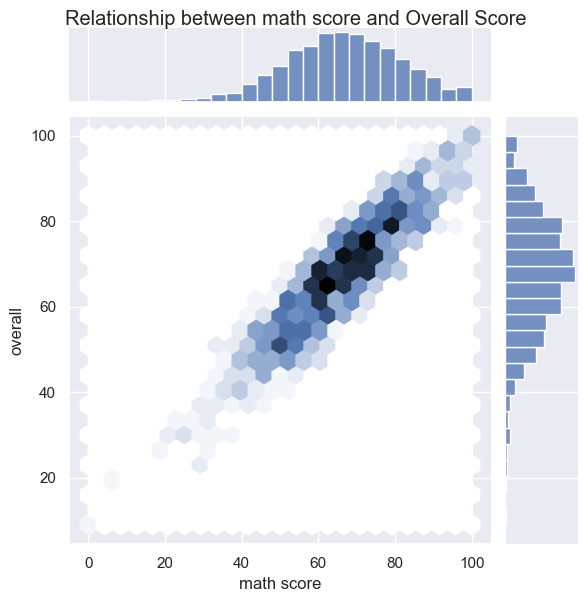

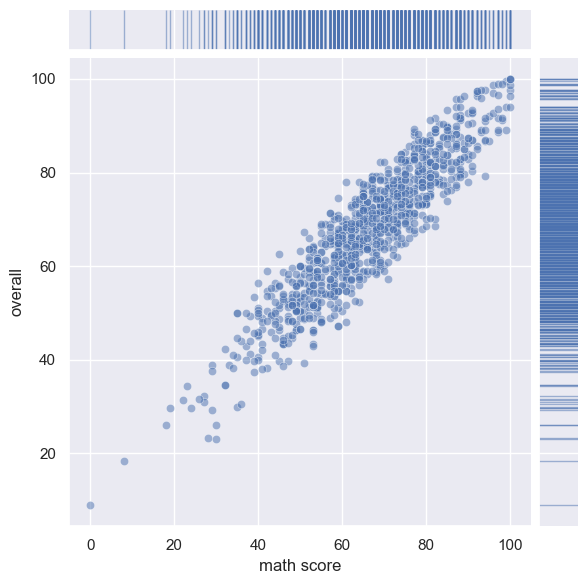

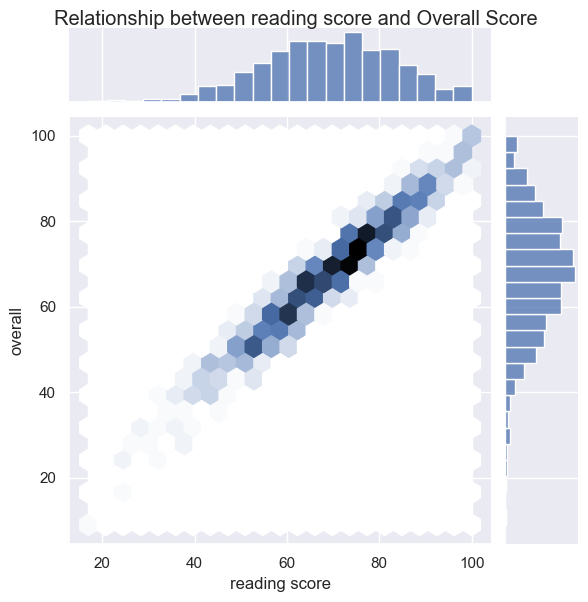

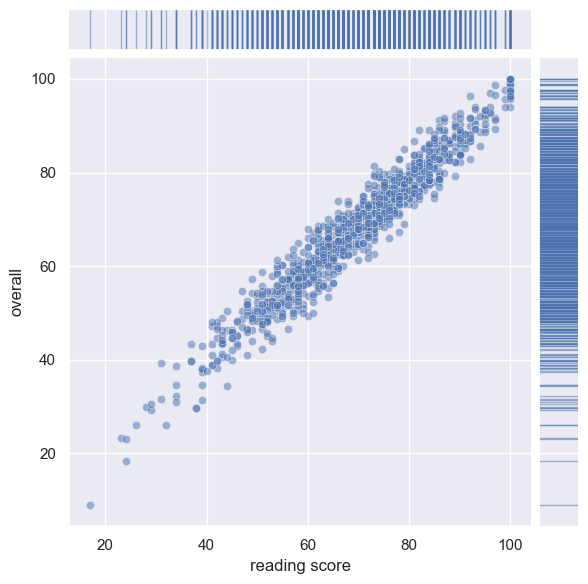

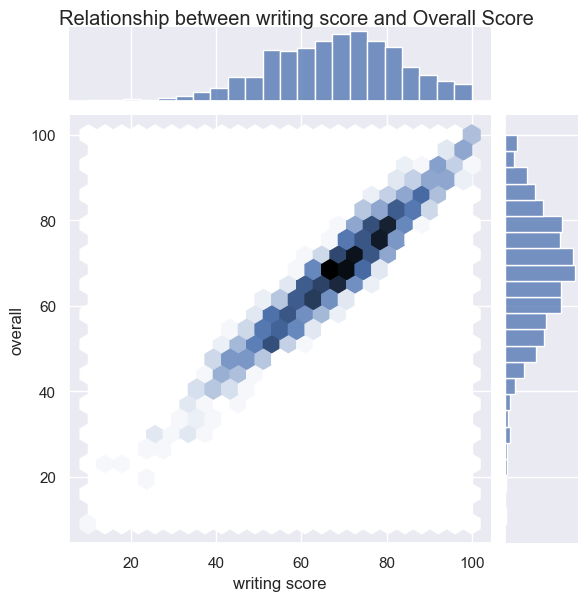

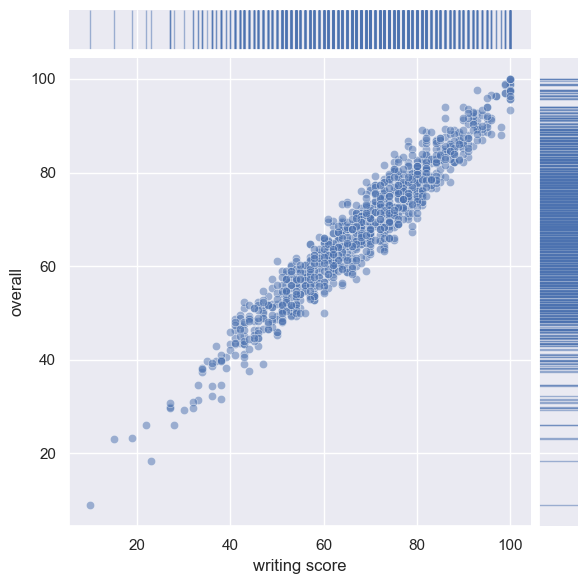

In [11]:
for feature in numerical_features:
    a = sns.jointplot(x = df[feature], y = df['overall'], kind = 'hex')
    a.fig.suptitle('Relationship between ' + feature +' and Overall Score', y=1)
    b = sns.JointGrid(data=df, x=feature, y="overall", ratio=10)
    b.plot_joint(sns.scatterplot, alpha=.5, legend=False, )
    b.plot_marginals(sns.rugplot, height=1, alpha=.5)
    plt.show()

## F. Corelation between Numerical Feaures of Data <a class="anchor" id="f"></a>

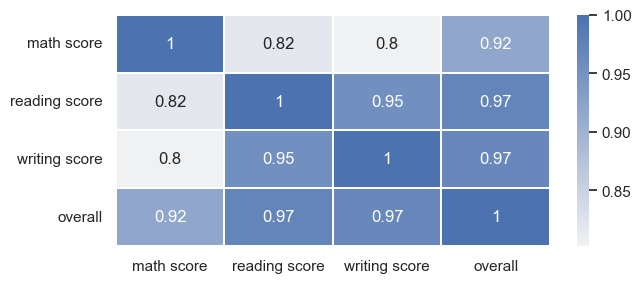

In [12]:
plt.figure(figsize=(7,3)) 
sns.heatmap(df.corr(), annot=True, linewidths = .2, cmap = sns.color_palette("light:b", as_cmap=True))
plt.show()

From the plots in the above two sections, it can be concluded that the score in the math subjects has the highest corelation with overall score. In other words if the student is good in maths, he/she will also get good overall score. Other subjects are also positively corelated wih overall score but their corelation coefficient is less than the math subject. 

---

The pair plots shows the joint distribution of differnet numerical features grouped by differnt categorical features. The plots in the diagnol are different from others and show the univariate distribution of variable. 

## G. Pair Plots of Numerical Features <a class="anchor" id="g"></a>

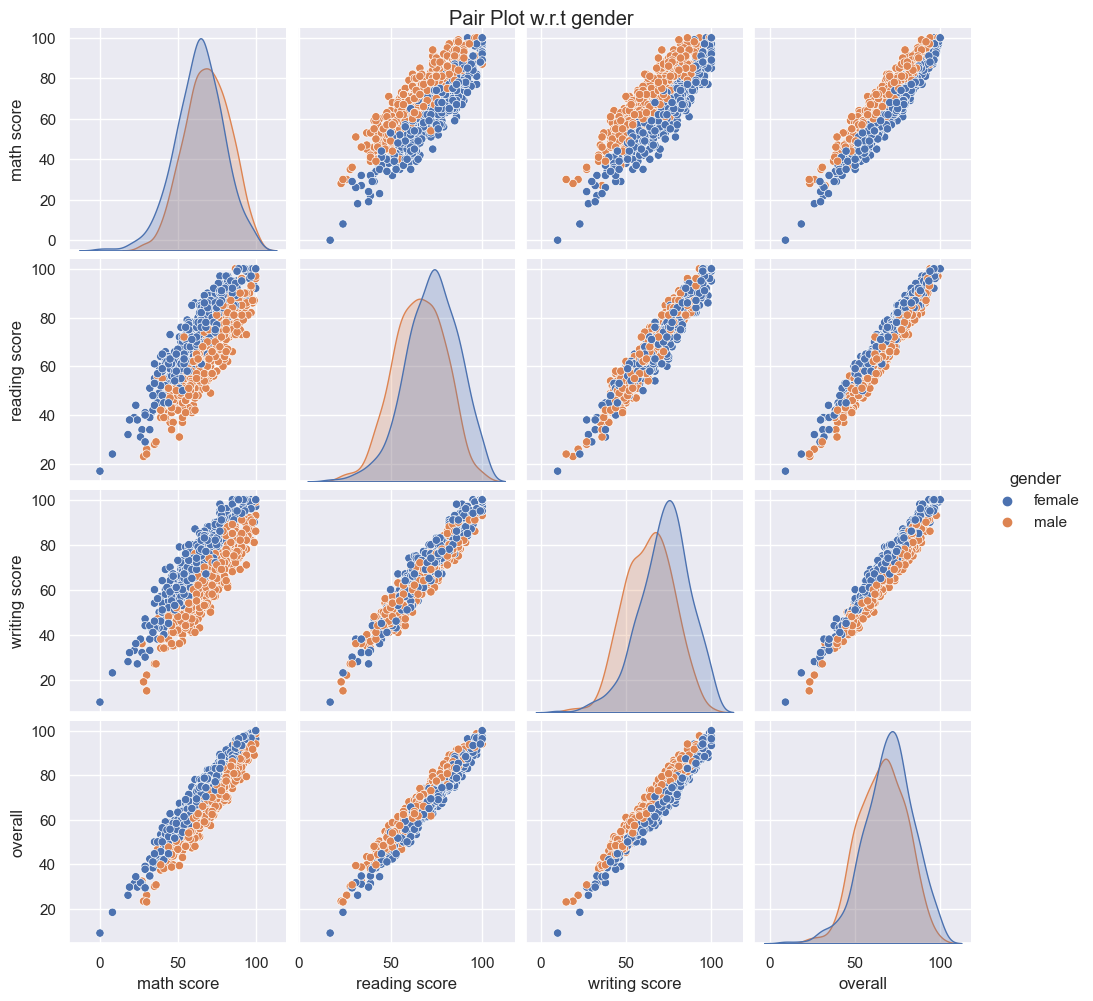

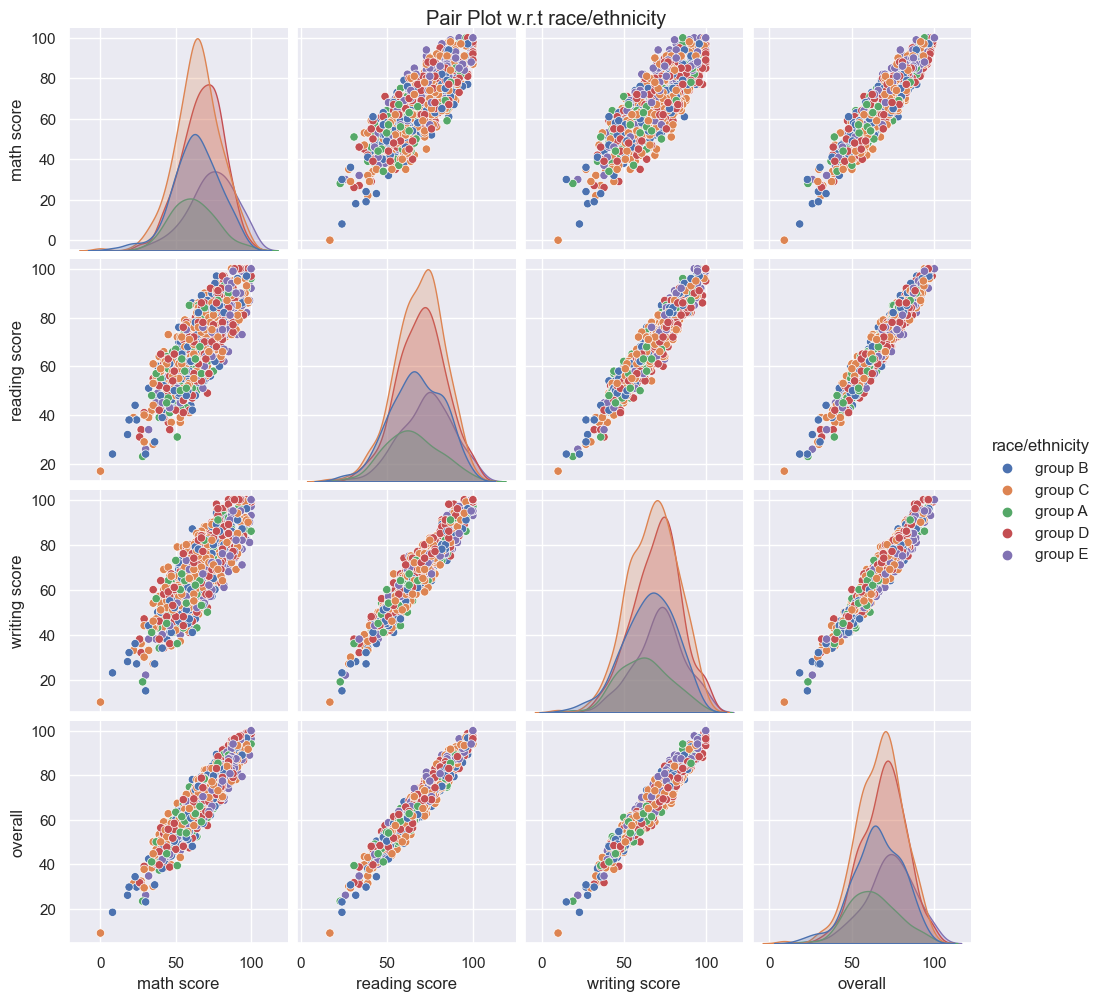

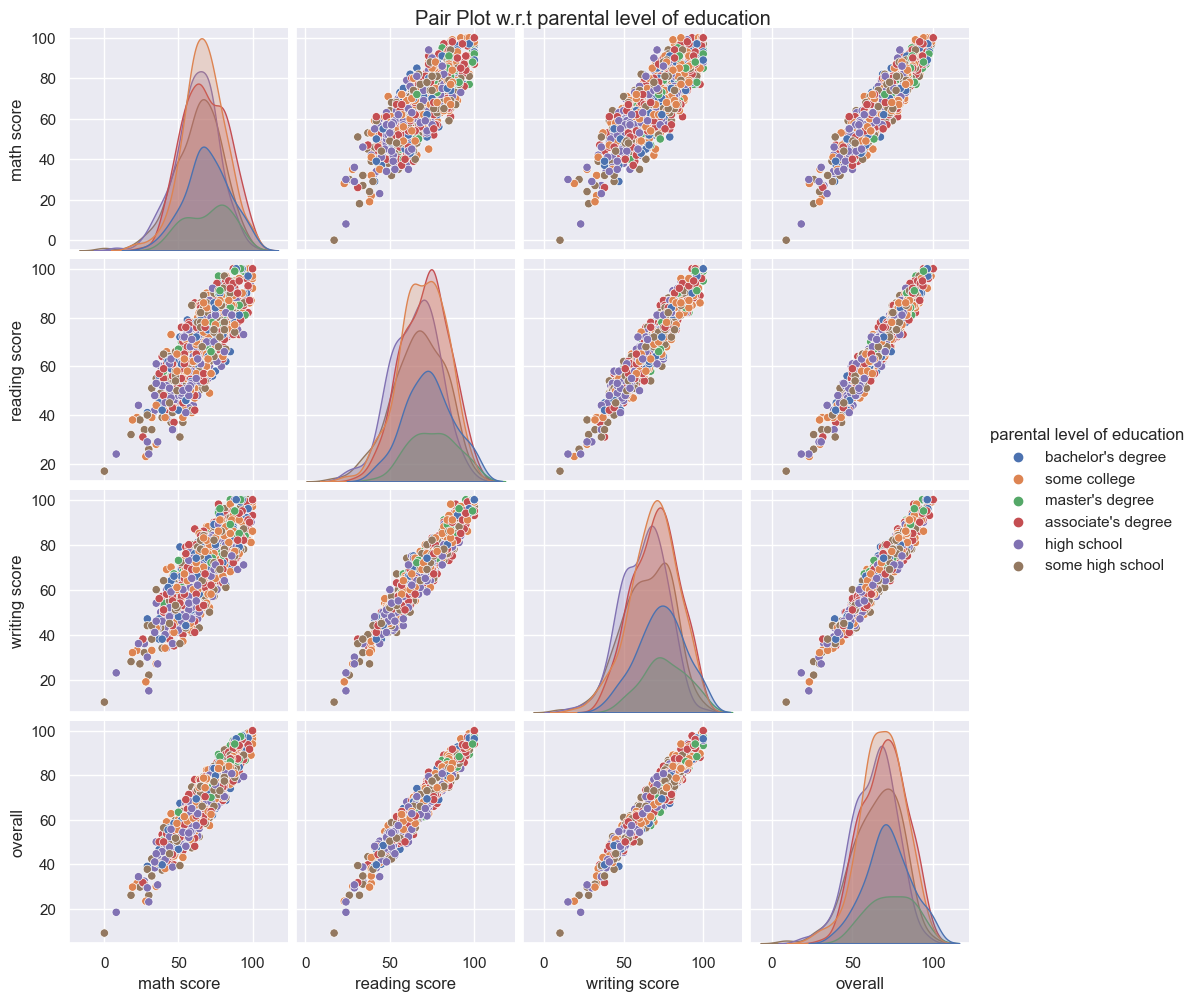

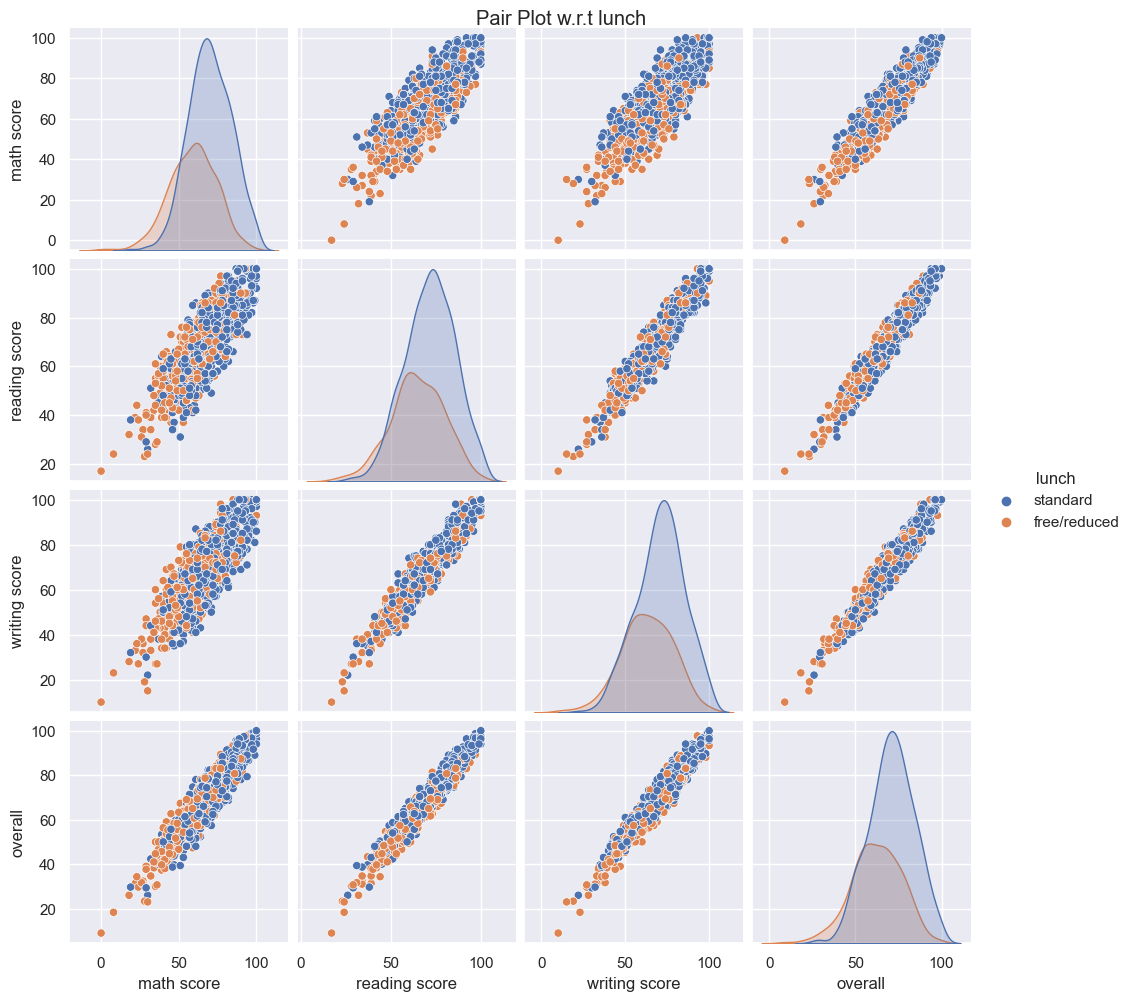

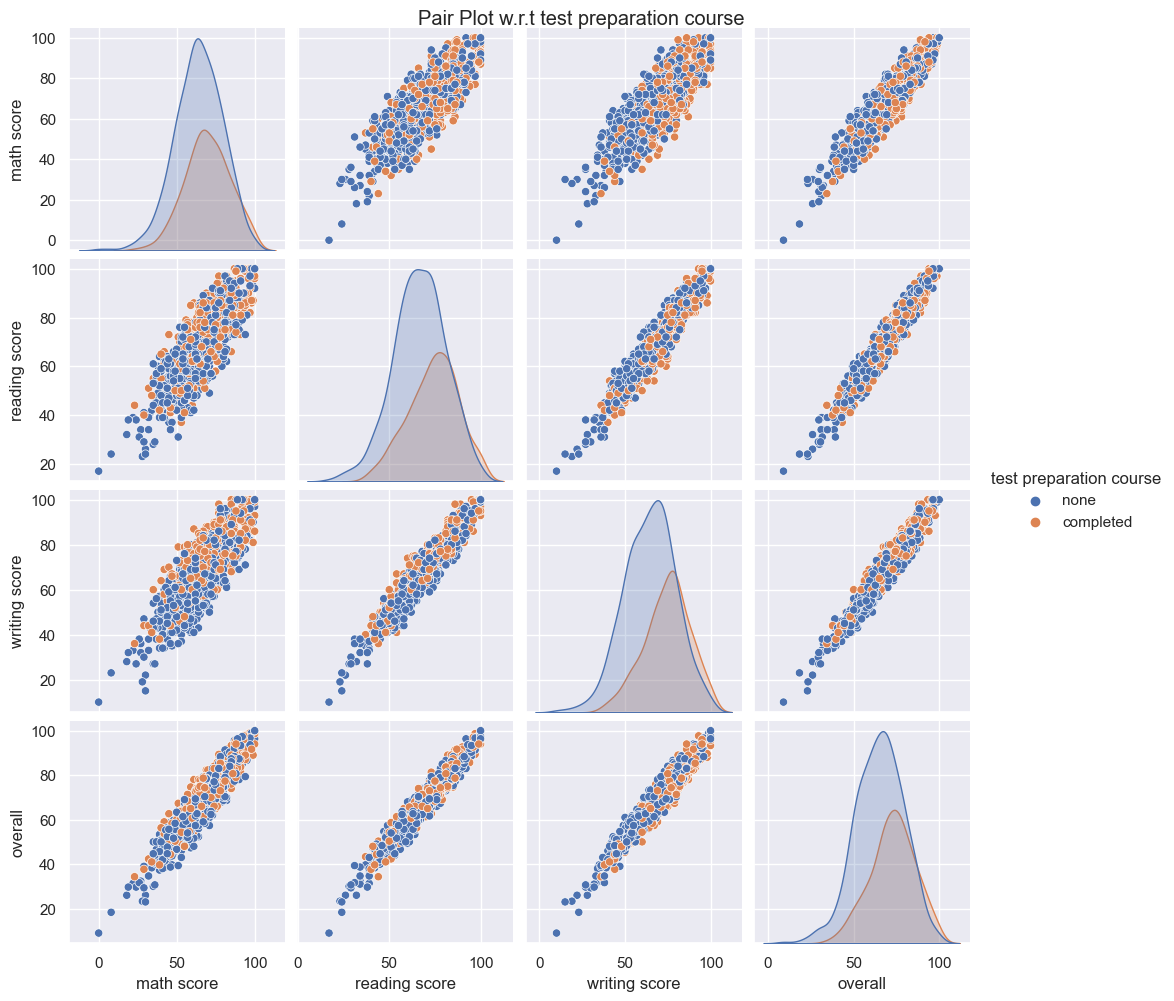

In [13]:
for feature in categorical_features:
    g= sns.pairplot(df, hue=feature)
    g.fig.suptitle('Pair Plot w.r.t ' + feature, y=1)
    plt.show()

After going through the plots above our original observations are varified again and some of the insights are as follows
- Male performs better in math while females perform better in readinga nd writing. 
- Females tends to perform better overall and the highest combined scores also belongs to females. 
- Group E ethnicity students on average perform better than other ethnicity groups. 
- Students having access to standard lunch and test preparation course performs better. 
- The percentage of students that have parents with a master's degree is relatively small but they perform better than other students. 

---

# References <a class="anchor" id="references"></a>

- [Dataset](http://roycekimmons.com/tools/generated_data/exams)
- [Seaborn](https://seaborn.pydata.org/)
- [Tufte (2001)](https://drive.google.com/file/d/1qzflKQ55teCIuGhCzEf2D55JRN9cOwBI/view?usp=sharing)
- [Bertin (2011)](https://drive.google.com/file/d/1Tl3YdKsG73eAiIJxMdNbtcGGv8n1izZy/view?usp=sharing)
- [Peter Pirolli and Stuart Card (2005)](https://drive.google.com/file/d/1o1WsfNB7PjBHDGsVzI5sN8KlyyZLoKvQ/view?usp=sharing)